In [1]:
! pip install --upgrade pip
!pip install tensorflow
! pip install scikit-learn
! pip install streamlit
!pip install librosa
! pip install numpy
! pip install pandas
! pip install matplotlib
!pip install kaggle


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.0 MB/s eta 0:00:00


In [2]:

import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.18.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Importing Libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

#### Training Image Preprocessing

In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"tanishsaroj","key":"85c227e916abcd7fa8ff56a2fc522c19"}'}

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p /content/Plant_disease_detection --unzip

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors


In [6]:
# import kagglehub
# import os

# # Define the target folder
# target_folder = "/content/Plant_disease_detection"

# # Ensure the folder exists
# os.makedirs(target_folder, exist_ok=True)

# # Download and extract dataset into the specified folder
# path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

# print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/new-plant-diseases-dataset


In [16]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/Plant_disease_detection/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred", # go inside the train folder and whatever is the name of the directory select it
    label_mode="categorical", # because it's a multiclass problem
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


#### Validation Image PreProcessing

In [17]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/Plant_disease_detection/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred", # go inside the train folder and whatever is the name of the directory select it
    label_mode="categorical", # because it's a multiclass problem
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [18]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [19]:
for x, y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[217.5  189.   194.  ]
   [219.5  193.5  199.5 ]
   [220.   197.75 200.25]
   ...
   [154.75 143.75 157.75]
   [151.75 140.75 154.75]
   [151.25 140.25 154.25]]

  [[220.25 193.25 198.25]
   [221.75 196.25 200.25]
   [221.75 200.   201.5 ]
   ...
   [156.5  145.5  159.5 ]
   [153.75 142.75 156.75]
   [153.5  142.5  156.5 ]]

  [[219.5  194.5  198.5 ]
   [219.25 194.25 197.25]
   [220.5  196.25 196.5 ]
   ...
   [158.5  147.5  161.5 ]
   [156.25 145.25 159.25]
   [157.   146.   160.  ]]

  ...

  [[ 95.25 100.75  75.  ]
   [129.25 130.25 106.25]
   [119.   115.25  92.75]
   ...
   [101.25  85.    44.75]
   [ 89.75  77.5   36.  ]
   [ 99.25  89.75  46.5 ]]

  [[112.25 117.25  94.25]
   [111.5  112.5   90.75]
   [123.   117.    95.25]
   ...
   [ 85.75  80.    41.25]
   [ 74.5   73.25  33.  ]
   [ 84.25  86.25  45.  ]]

  [[125.75 132.25 108.75]
   [108.   109.5   87.5 ]
   [138.   131.5  110.  ]
   ...
   [ 80.25  88.    47.  ]
   [ 65.25  76.    34.  ]
   [ 69.5   83.    4

## Building Model

In [20]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten, Dropout
from tensorflow.keras.models import Sequential

In [21]:
model = Sequential()

In [22]:
# Building Convolution layer

In [23]:
# 1st layer
model.add(Conv2D(filters=32,kernel_size=3, padding = 'same', activation='relu', input_shape=[128,128,3])) # basically image box
model.add(Conv2D(filters=32,kernel_size=3,  activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# 2nd Layer
model.add(Conv2D(filters=64,kernel_size=3, padding = 'same', activation='relu')) # basically image box
model.add(Conv2D(filters=64,kernel_size=3, activation='relu'))#2nd layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [25]:
# 3rd Layer
model.add(Conv2D(filters=128,kernel_size=3, padding = 'same', activation='relu')) # basically image box
model.add(Conv2D(filters=128,kernel_size=3,  activation='relu'))#2nd layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [26]:
# 4th layer
model.add(Conv2D(filters=256,kernel_size=3, padding = 'same', activation='relu')) # basically image box
model.add(Conv2D(filters=256,kernel_size=3, activation='relu'))#2nd layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
# 5th layer
model.add(Conv2D(filters=512,kernel_size=3, padding = 'same', activation='relu')) # basically image box
model.add(Conv2D(filters=512,kernel_size=3, activation='relu'))#2nd layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Dropout(0.25))

In [29]:
# Flattening
model.add(Flatten())

In [30]:
# Dense layer
model.add(Dense(units=1500, activation='relu')) # units = neuron

In [31]:
model.add(Dropout(0.40))

In [32]:
# output :- prediction by each class
model.add(Dense(units=38, activation='softmax')) # softmax cause output by each class
                                                 # so select that class which is having maximum probability

### Compiling the model

In [33]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics=['accuracy']) # categorical_crossentropy for multiclasses

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [35]:
training_history=model.fit(x=training_set, validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 166s 69ms/step - accuracy: 0.4075 - loss: 2.1149 - val_accuracy: 0.8385 - val_loss: 0.5003
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 184s 65ms/step - accuracy: 0.8421 - loss: 0.5002 - val_accuracy: 0.9200 - val_loss: 0.2472
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 202s 65ms/step - accuracy: 0.9093 - loss: 0.2824 - val_accuracy: 0.9338 - val_loss: 0.2041
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 192s 61ms/step - accuracy: 0.9387 - loss: 0.1896 - val_accuracy: 0.9434 - val_loss: 0.1719
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 60ms/step - accuracy: 0.9534 - loss: 0.1410 - val_accuracy: 0.9467 - val_loss: 0.1653
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 153s 65ms/step - accuracy: 0.9621 - loss: 0.1181 - val_accuracy: 0.9544 - val_loss: 0.1492
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 191s 60ms/step - accuracy: 0.9688 - loss: 0.0919 - val_accuracy: 0.9610 - val_loss: 0.1224
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 141s 60ms/step - accuracy: 

### Model Evaluation

In [36]:
### Model evaluation on Training set
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - accuracy: 0.9906 - loss: 0.0333


In [37]:
print(train_loss,train_acc)

0.03122163563966751 0.9909951090812683


In [38]:
val_loss,train_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9681 - loss: 0.1157


### Saving model

In [39]:
model.save('trained_model.keras') # saving in keras's own native format as h5 is considered as legacy and .keras is more robust as compared

In [15]:
# keras.models.load_model('/content/trained_model.keras') ## to call

NameError: name 'keras' is not defined

In [40]:
training_history.history

{'accuracy': [0.6109111309051514,
  0.8642293214797974,
  0.9172060489654541,
  0.9423003196716309,
  0.9556440711021423,
  0.9637669920921326,
  0.9704957604408264,
  0.9757735133171082,
  0.9797567129135132,
  0.9814638495445251],
 'loss': [1.3302764892578125,
  0.4289713203907013,
  0.2579571008682251,
  0.17741753160953522,
  0.13369938731193542,
  0.1085493341088295,
  0.08753916621208191,
  0.07426434755325317,
  0.06190989539027214,
  0.056949835270643234],
 'val_accuracy': [0.8385499715805054,
  0.9200432300567627,
  0.9337582588195801,
  0.943375825881958,
  0.9466765522956848,
  0.954359233379364,
  0.9610175490379333,
  0.9690985679626465,
  0.9602208137512207,
  0.9670498371124268],
 'val_loss': [0.5002635717391968,
  0.24715028703212738,
  0.20407553017139435,
  0.17191961407661438,
  0.1652834713459015,
  0.14918190240859985,
  0.12235552072525024,
  0.09814777970314026,
  0.1350100338459015,
  0.12182612717151642]}

### Accuracy Visualization

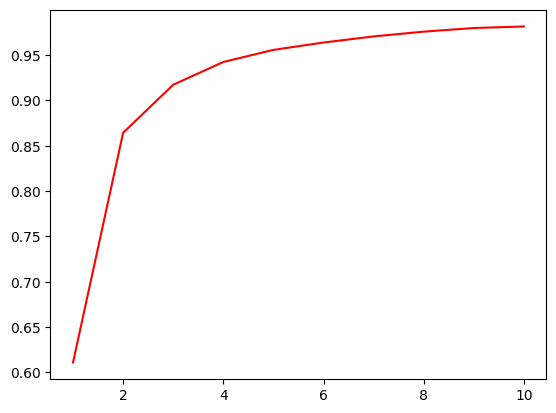

In [41]:
# for train accuracy
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.show()

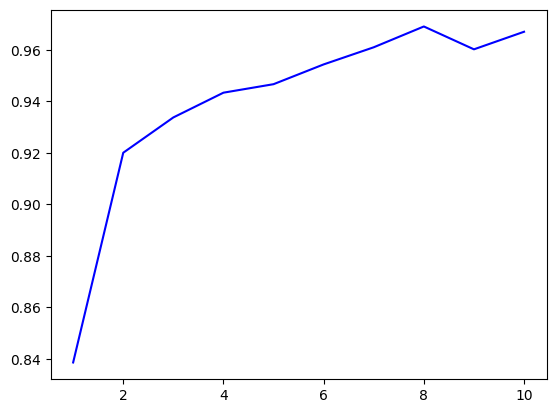

In [42]:
# for value accuracy
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Value Accuracy')
plt.show()

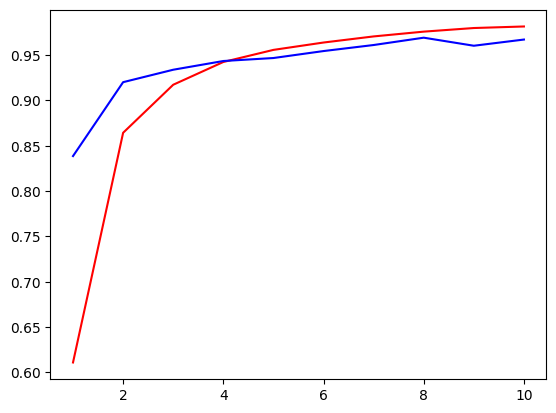

In [43]:
# Comparison
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Value Accuracy')

plt.show()

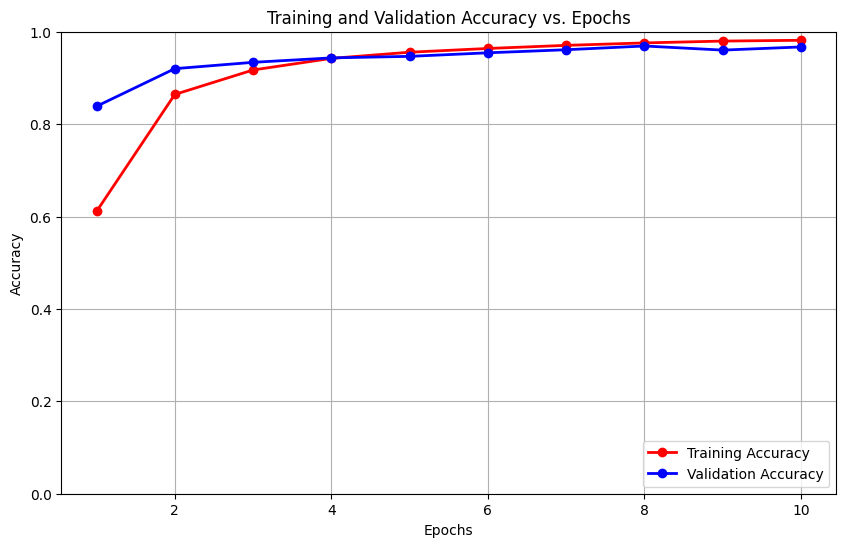

In [44]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 11)]

plt.figure(figsize=(10, 6))  # Adjust plot size
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy', linewidth=2, marker='o')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy', linewidth=2, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Epochs')
plt.legend(loc='lower right') # change legend location
plt.grid(True)
plt.ylim(0,1) # set y axis limits.

plt.show()

### Some other metrics for model evaluation

In [45]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [46]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/Plant_disease_detection/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred", # go inside the train folder and whatever is the name of the directory select it
    label_mode="categorical", # because it's a multiclass problem
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 17572 files belonging to 38 classes.


In [49]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step


(array([[1.00000000e+00, 2.60125298e-12, 1.88764630e-14, ...,
         2.20025493e-17, 1.78658418e-18, 8.39012273e-17],
        [9.99998689e-01, 5.28092059e-09, 3.22175381e-12, ...,
         4.33843118e-15, 1.28520478e-15, 1.31485464e-15],
        [1.00000000e+00, 6.92572222e-10, 2.67154110e-13, ...,
         3.45583818e-18, 3.98202206e-16, 1.25358261e-15],
        ...,
        [1.01683355e-08, 3.01537684e-10, 7.09302583e-07, ...,
         2.69881395e-10, 5.76052643e-11, 9.99985337e-01],
        [6.23757828e-08, 3.64159952e-10, 2.46905302e-07, ...,
         7.80689791e-10, 2.22389676e-10, 9.99997258e-01],
        [1.84413692e-14, 5.64133980e-15, 1.45758731e-13, ...,
         1.63104836e-16, 1.33814858e-14, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [50]:
predicted_categories = tf.argmax(y_pred, axis =1)

In [51]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [53]:
 true_categories = tf.concat([y for x,y in test_set], axis=0)
 true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [56]:
Y_true = tf.argmax(true_categories, axis =1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

https://doimages.nyc3.cdn.digitaloceanspaces.com/010AI-ML/content/images/2020/09/Fig05.jpg

In [62]:
# Precision RECALL
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(Y_true,predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.97      0.97       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.99      0.98       440
                                   Apple___healthy       0.97      0.99      0.98       502
                               Blueberry___healthy       0.99      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.81      0.96      0.88       410
                       Corn_(maize)___Common_rust_       1.00      0.92      0.96       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.92      0.

In [65]:
cnf_mat = confusion_matrix(Y_true, predicted_categories)
cnf_mat

array([[487,   0,   0, ...,   0,   0,   0],
       [  2, 488,   1, ...,   0,   0,   0],
       [  0,   0, 435, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 484,   0,   0],
       [  0,   0,   0, ...,   0, 443,   0],
       [  0,   0,   2, ...,   0,   0, 472]])

### Confusion matrix Visualisation

Text(595.7222222222223, 0.5, 'Actual Class')

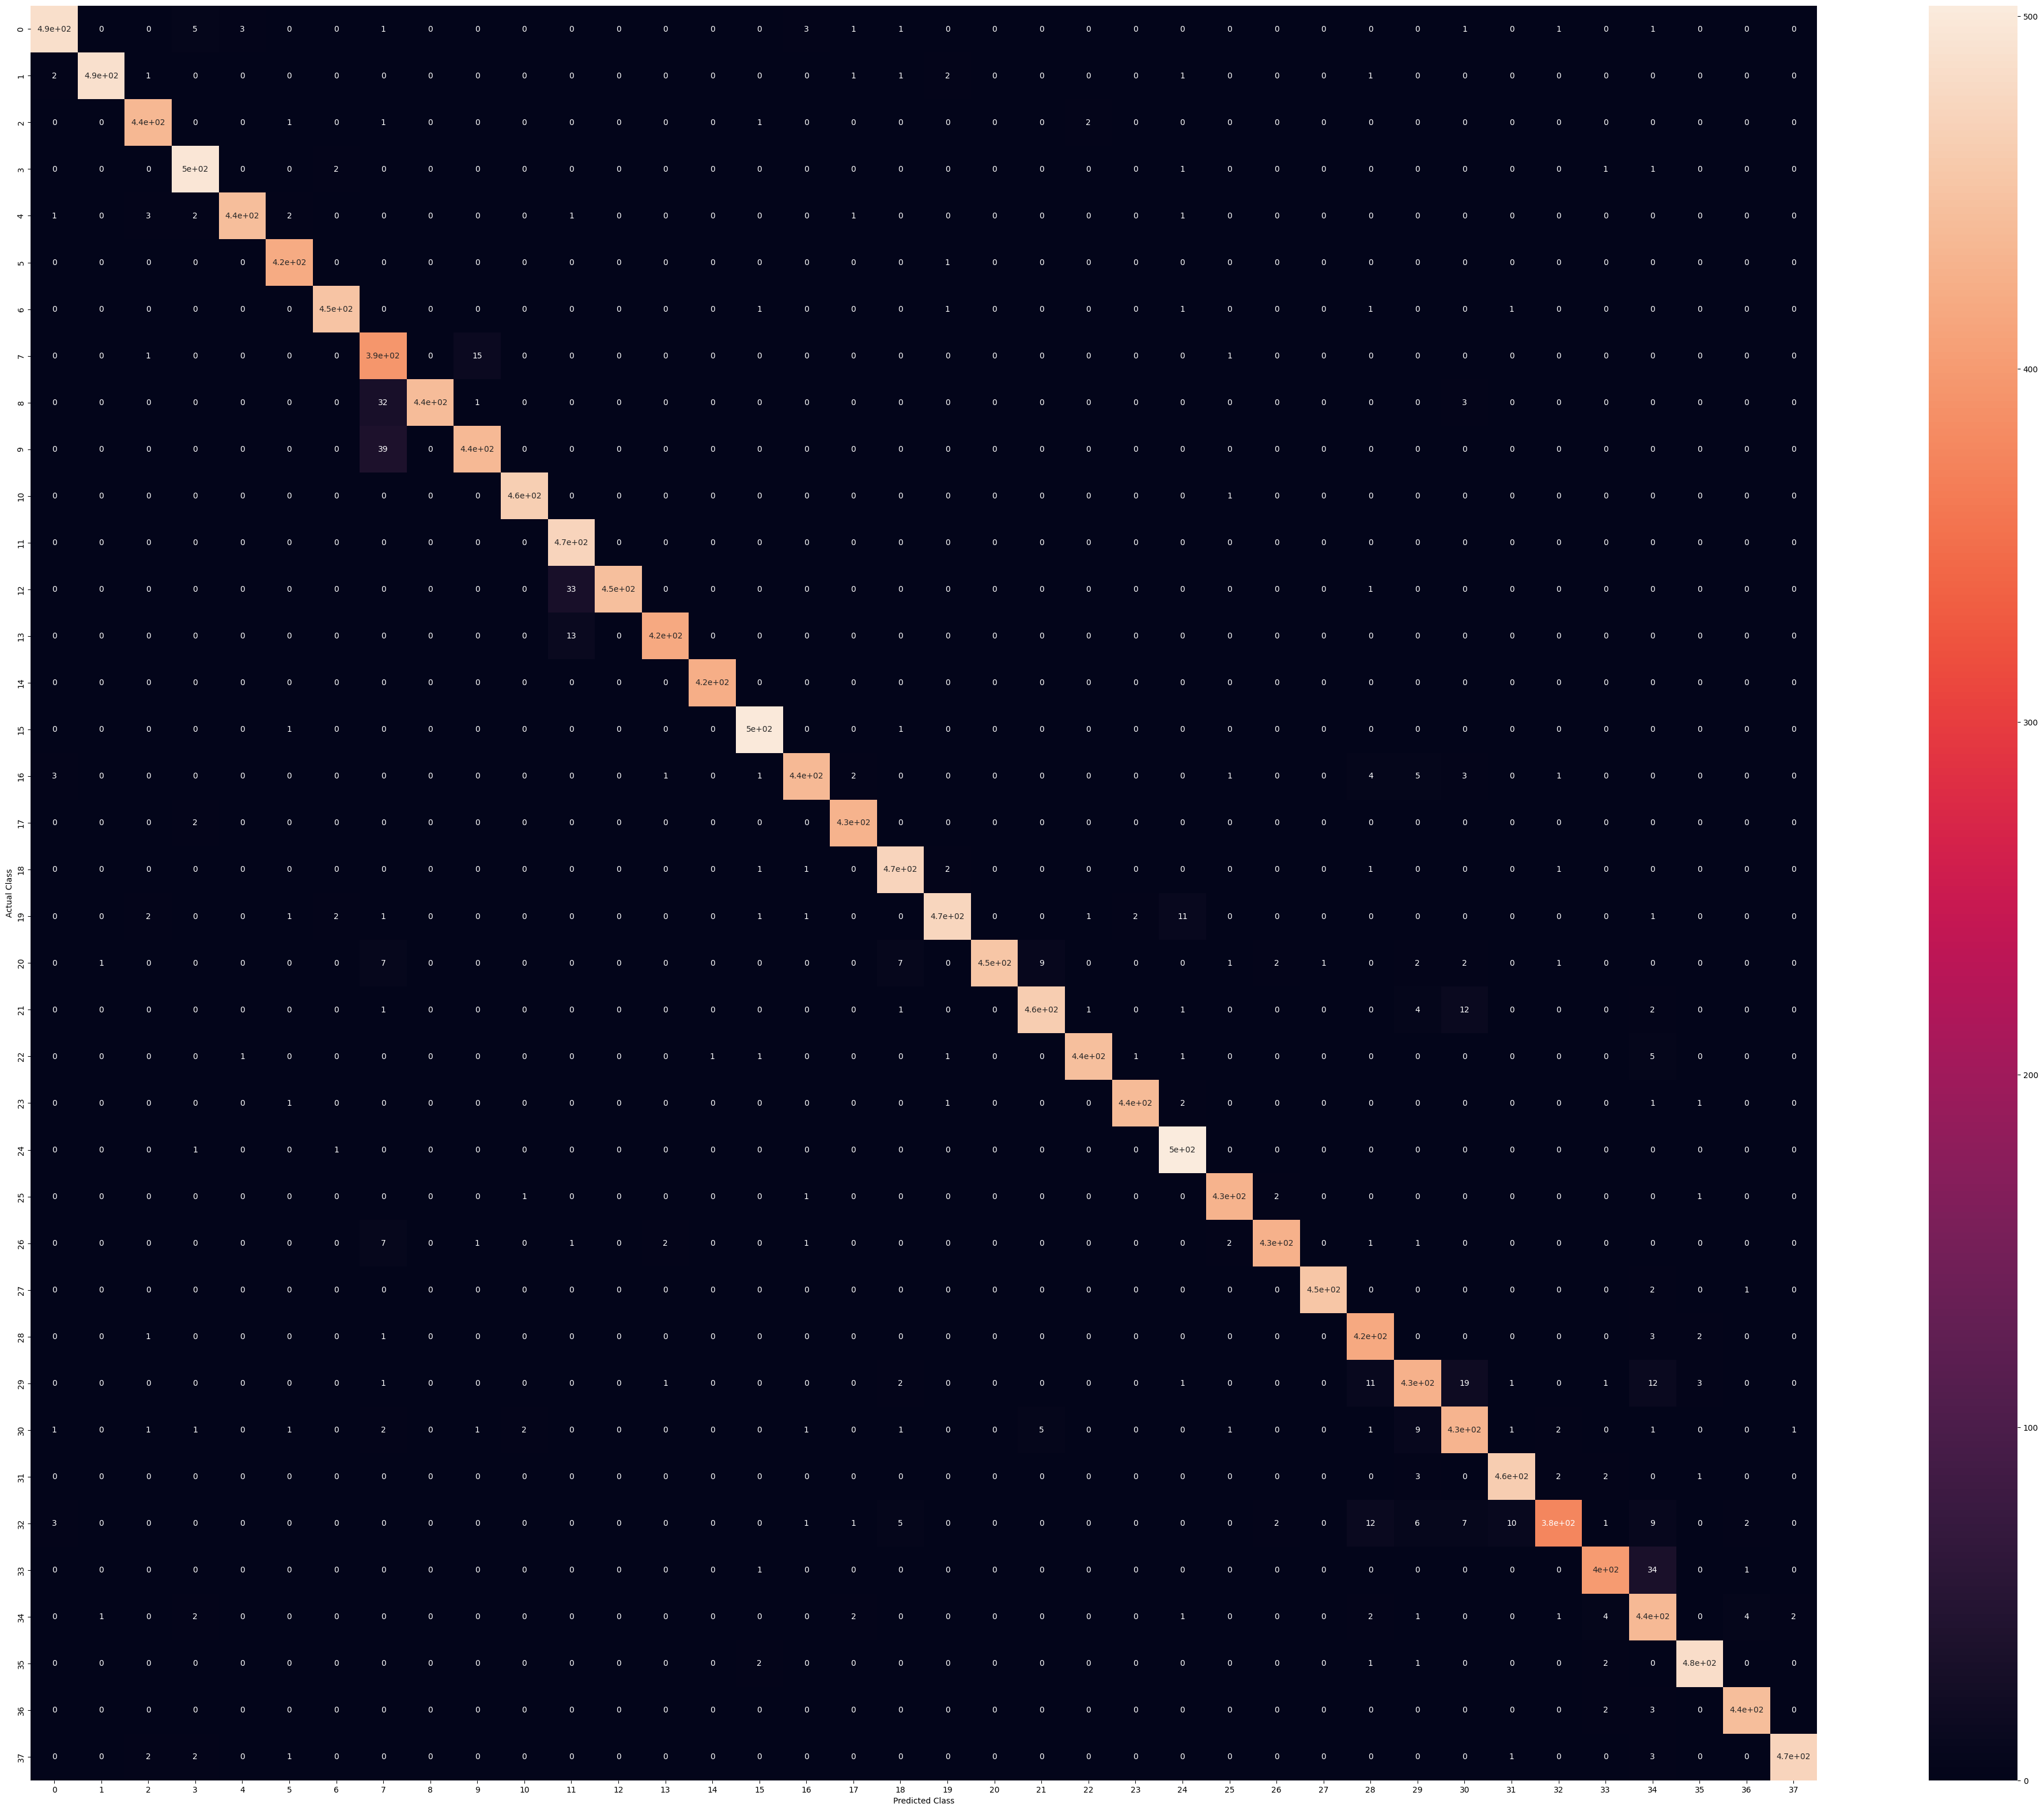

In [71]:
plt.figure(figsize=[50,40])
sns.heatmap(cnf_mat, annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")

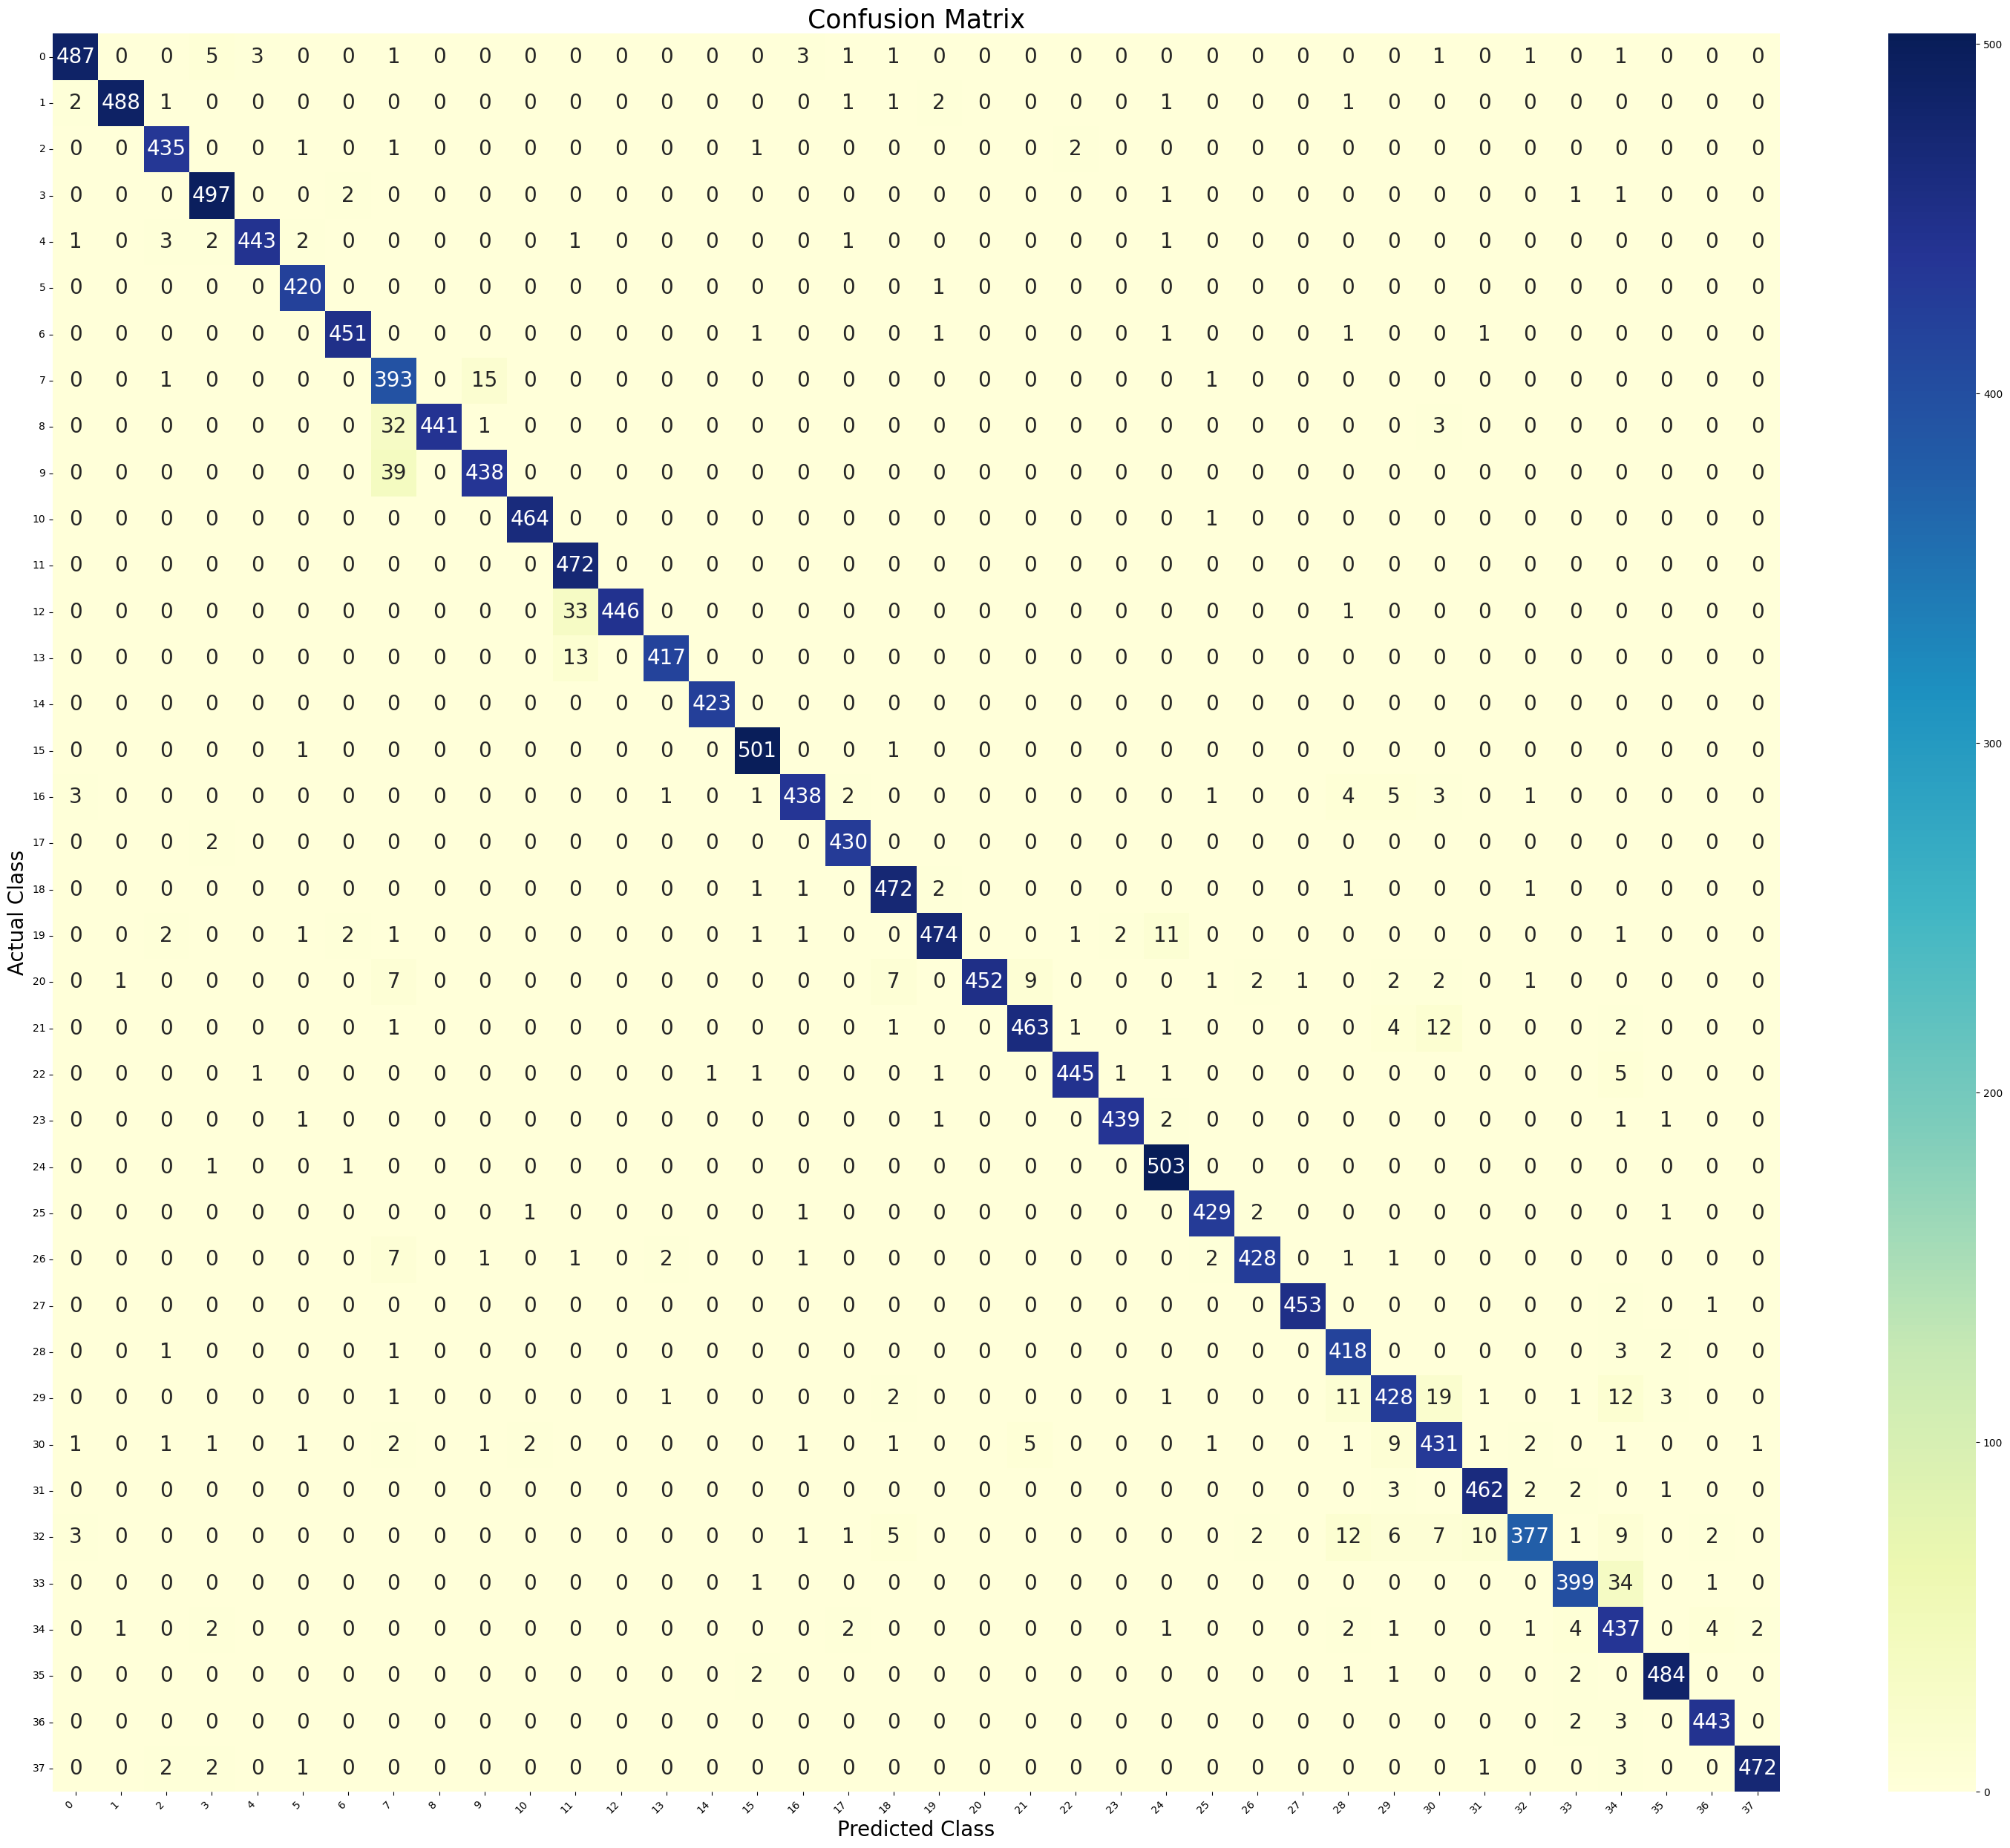

In [76]:
plt.figure(figsize=(30, 25))  # Wider and taller figure
sns.heatmap(cnf_mat, annot=True, fmt='d', cmap='YlGnBu',
            annot_kws={"size": 20})  # Adjust font size for annotations
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)
plt.title("Confusion Matrix", fontsize=25)
plt.tight_layout()  # Prevent label clipping
plt.show()
